11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8712 - loss: 0.4289 - val_accuracy: 0.9854 - val_loss: 0.0467
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9823 - loss: 0.0556 - val_accuracy: 0.9846 - val_loss: 0.0469
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9885 - loss: 0.0359 - val_accuracy: 0.9878 - val_loss: 0.0394
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9892 - val_loss: 0.0342
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9902 - val_loss: 0.0297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
True Label: 7
Predicted Label: 7


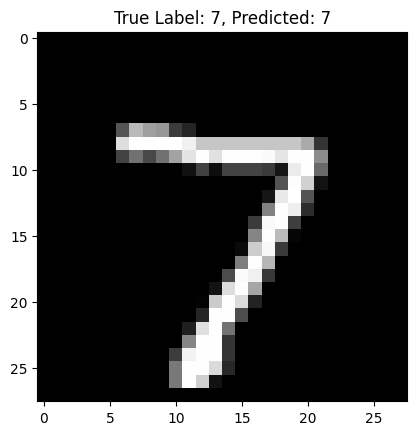

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: Normalize the images to [0, 1] and reshape to (28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (28, 28, 1) to match the CNN input shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 2: Define the CNN model
model = models.Sequential([
    # First convolutional layer with 32 filters of size (3x3)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters of size (3x3)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer with 64 filters of size (3x3)
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output of the convolutional layers to feed into dense layers
    layers.Flatten(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu'),

    # Output layer with 10 neurons (one for each digit)
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Step 5: Now, you can run the prediction code

# Select a test image from the test set
sample_index = 0  # You can change this index to test other images
test_image = x_test[sample_index]
test_label = y_test[sample_index]

# Reshape the image to match the input shape (28, 28, 1)
test_image = test_image.reshape(1, 28, 28, 1)

# Predict the class of the image
prediction = model.predict(test_image)

# Get the predicted label (highest probability)
predicted_label = np.argmax(prediction)

# Print the result
print(f"True Label: {test_label}")
print(f"Predicted Label: {predicted_label}")

# Display the image and the prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {test_label}, Predicted: {predicted_label}")
plt.show()
